In [1]:
import requests
from bs4 import BeautifulSoup
import json 
import pandas as pd 
import numpy as np 
from mplsoccer import VerticalPitch 

In [2]:
from PIL import Image
from io import BytesIO

In [3]:
url='https://understat.com/match/26987'
page=requests.get(url)

In [4]:
table=BeautifulSoup(page.text,'html')
strings=table.find_all('script')[1].string

In [5]:
start=strings.index("('")+2
end=strings.index("')")
json_data=strings[start:end]

In [6]:
json_data = json_data.encode('utf8').decode('unicode_escape')

In [7]:
data=json.loads(json_data)

In [8]:
#There is h and a in matches
id=[]
minute=[]
result=[]
X=[]
Y=[]
xG=[]
player=[]
h_a=[]
player_id=[]
situation=[]
season=[]
shotType=[]
match_id=[]
h_team=[]
a_team=[]
h_goals=[]
a_goals=[]
date=[]
player_assisted=[]
lastAction=[]
data_away=data['a']
data_home=data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key=='id':
            id.append(data_home[index][key])
        if key=='minute':
            minute.append(data_home[index][key])
        if key=='result':
            result.append(data_home[index][key])
        if key=='X':
            X.append(data_home[index][key])
        if key=='Y':
            Y.append(data_home[index][key])
        if key=='xG':
            xG.append(data_home[index][key])
        if key=='player':
            player.append(data_home[index][key])
        if key=='h_a':
            h_a.append(data_home[index][key])
        if key=='player_id':
            player_id.append(data_home[index][key])
        if key=='situation':
            situation.append(data_home[index][key])
        if key=='season':
            season.append(data_home[index][key])
        if key=='shotType':
            shotType.append(data_home[index][key])
        if key=='match_id':
            match_id.append(data_home[index][key])
        if key=='h_team':
            h_team.append(data_home[index][key])
        if key=='a_team':
            a_team.append(data_home[index][key])
        if key=='h_goals':
            h_goals.append(data_home[index][key])
        if key=='a_goals':
            a_goals.append(data_home[index][key])
        if key=='date':
            date.append(data_home[index][key])            
        if key=='player_assisted':
            player_assisted.append(data_home[index][key])
        if key=='lastAction':
            lastAction.append(data_home[index][key])







for index in range(len(data_away)):
    for key in data_away[index]:
        if key=='id':
            id.append(data_away[index][key])
        if key=='minute':
            minute.append(data_away[index][key])
        if key=='result':
            result.append(data_away[index][key])
        if key=='X':
            X.append(data_away[index][key])
        if key=='Y':
            Y.append(data_away[index][key])
        if key=='xG':
            xG.append(data_away[index][key])
        if key=='player':
            player.append(data_away[index][key])
        if key=='h_a':
            h_a.append(data_away[index][key])
        if key=='player_id':
            player_id.append(data_away[index][key])
        if key=='situation':
            situation.append(data_away[index][key])
        if key=='season':
            season.append(data_away[index][key])
        if key=='shotType':
            shotType.append(data_away[index][key])
        if key=='match_id':
            match_id.append(data_away[index][key])
        if key=='h_team':
            h_team.append(data_away[index][key])
        if key=='a_team':
            a_team.append(data_away[index][key])
        if key=='h_goals':
            h_goals.append(data_away[index][key])
        if key=='a_goals':
            a_goals.append(data_away[index][key])
        if key=='date':
            date.append(data_away[index][key])            
        if key=='player_assisted':
            player_assisted.append(data_away[index][key])
        if key=='lastAction':
            lastAction.append(data_away[index][key])

In [9]:
col_names=['id','minute','result','X','Y','xG','player','h_a','player_id',"situation",'season','shotType','match_id',
'h_team','a_team',"h_goals","a_goals","date",'player_assisted','lastAction']

In [10]:
df=pd.DataFrame([id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,
h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction],index=col_names)

In [11]:
df=df.T

In [12]:
df_Yamal1=df[df['player']=='Lamine Yamal']

In [13]:
df_Yamal1

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
6,585109,5,BlockedShot,0.8519999694824218,0.4570000076293945,0.08588103950023651,Lamine Yamal,a,11527,OpenPlay,2024,LeftFoot,26987,Valencia,Barcelona,1,2,2024-08-17 19:30:00,Robert Lewandowski,TakeOn
10,585115,36,MissedShots,0.795,0.48700000762939455,0.06877048313617706,Lamine Yamal,a,11527,OpenPlay,2024,RightFoot,26987,Valencia,Barcelona,1,2,2024-08-17 19:30:00,None,TakeOn
12,585122,45,SavedShot,0.899000015258789,0.46099998474121096,0.43306466937065125,Lamine Yamal,a,11527,OpenPlay,2024,RightFoot,26987,Valencia,Barcelona,1,2,2024-08-17 19:30:00,Raphinha,BallTouch
15,585120,49,MissedShots,0.9290000152587891,0.29700000762939455,0.026261771097779274,Lamine Yamal,a,11527,OpenPlay,2024,RightFoot,26987,Valencia,Barcelona,1,2,2024-08-17 19:30:00,Álex Balde,Cross


In [14]:
df1=df_Yamal1.drop(columns=['id','season','h_goals','a_goals','date'],axis=1)

In [15]:
df1['xG']=df1['xG'].astype(float)

In [16]:
df1

,minute,result,X,Y,xG,player,h_a,player_id,situation,shotType,match_id,h_team,a_team,player_assisted,lastAction
6,5,BlockedShot,0.8519999694824218,0.4570000076293945,0.085881,Lamine Yamal,a,11527,OpenPlay,LeftFoot,26987,Valencia,Barcelona,Robert Lewandowski,TakeOn
10,36,MissedShots,0.795,0.48700000762939455,0.068770,Lamine Yamal,a,11527,OpenPlay,RightFoot,26987,Valencia,Barcelona,None,TakeOn
12,45,SavedShot,0.899000015258789,0.46099998474121096,0.433065,Lamine Yamal,a,11527,OpenPlay,RightFoot,26987,Valencia,Barcelona,Raphinha,BallTouch
15,49,MissedShots,0.9290000152587891,0.29700000762939455,0.026262,Lamine Yamal,a,11527,OpenPlay,RightFoot,26987,Valencia,Barcelona,Álex Balde,Cross


In [17]:
url='https://understat.com/match/26995'
page=requests.get(url)

In [18]:
table=BeautifulSoup(page.text,'html')
strings=table.find_all('script')[1].string

In [19]:
start=strings.index("('")+2
end=strings.index("')")
json_data=strings[start:end]

In [20]:
json_data = json_data.encode('utf8').decode('unicode_escape')

In [21]:
data=json.loads(json_data)

In [22]:
#There is h and a in matches
id=[]
minute=[]
result=[]
X=[]
Y=[]
xG=[]
player=[]
h_a=[]
player_id=[]
situation=[]
season=[]
shotType=[]
match_id=[]
h_team=[]
a_team=[]
h_goals=[]
a_goals=[]
date=[]
player_assisted=[]
lastAction=[]
data_away=data['a']
data_home=data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key=='id':
            id.append(data_home[index][key])
        if key=='minute':
            minute.append(data_home[index][key])
        if key=='result':
            result.append(data_home[index][key])
        if key=='X':
            X.append(data_home[index][key])
        if key=='Y':
            Y.append(data_home[index][key])
        if key=='xG':
            xG.append(data_home[index][key])
        if key=='player':
            player.append(data_home[index][key])
        if key=='h_a':
            h_a.append(data_home[index][key])
        if key=='player_id':
            player_id.append(data_home[index][key])
        if key=='situation':
            situation.append(data_home[index][key])
        if key=='season':
            season.append(data_home[index][key])
        if key=='shotType':
            shotType.append(data_home[index][key])
        if key=='match_id':
            match_id.append(data_home[index][key])
        if key=='h_team':
            h_team.append(data_home[index][key])
        if key=='a_team':
            a_team.append(data_home[index][key])
        if key=='h_goals':
            h_goals.append(data_home[index][key])
        if key=='a_goals':
            a_goals.append(data_home[index][key])
        if key=='date':
            date.append(data_home[index][key])            
        if key=='player_assisted':
            player_assisted.append(data_home[index][key])
        if key=='lastAction':
            lastAction.append(data_home[index][key])







for index in range(len(data_away)):
    for key in data_away[index]:
        if key=='id':
            id.append(data_away[index][key])
        if key=='minute':
            minute.append(data_away[index][key])
        if key=='result':
            result.append(data_away[index][key])
        if key=='X':
            X.append(data_away[index][key])
        if key=='Y':
            Y.append(data_away[index][key])
        if key=='xG':
            xG.append(data_away[index][key])
        if key=='player':
            player.append(data_away[index][key])
        if key=='h_a':
            h_a.append(data_away[index][key])
        if key=='player_id':
            player_id.append(data_away[index][key])
        if key=='situation':
            situation.append(data_away[index][key])
        if key=='season':
            season.append(data_away[index][key])
        if key=='shotType':
            shotType.append(data_away[index][key])
        if key=='match_id':
            match_id.append(data_away[index][key])
        if key=='h_team':
            h_team.append(data_away[index][key])
        if key=='a_team':
            a_team.append(data_away[index][key])
        if key=='h_goals':
            h_goals.append(data_away[index][key])
        if key=='a_goals':
            a_goals.append(data_away[index][key])
        if key=='date':
            date.append(data_away[index][key])            
        if key=='player_assisted':
            player_assisted.append(data_away[index][key])
        if key=='lastAction':
            lastAction.append(data_away[index][key])

In [23]:
col_names=['id','minute','result','X','Y','xG','player','h_a','player_id',"situation",'season','shotType','match_id',
'h_team','a_team',"h_goals","a_goals","date",'player_assisted','lastAction']

In [24]:
df=pd.DataFrame([id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,
h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction],index=col_names)

In [25]:
df=df.T

In [26]:
df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,586419,10,SavedShot,0.7240000152587891,0.534000015258789,0.01895844377577305,Ferrán Torres,h,6441,OpenPlay,2024,RightFoot,26995,Barcelona,Athletic Club,2,1,2024-08-24 17:00:00,Iñigo Martínez,TakeOn
1,586421,19,SavedShot,0.8830000305175781,0.539000015258789,0.41309571266174316,Raphinha,h,8026,OpenPlay,2024,LeftFoot,26995,Barcelona,Athletic Club,2,1,2024-08-24 17:00:00,Pedri,Throughball
2,586423,21,MissedShots,0.8869999694824219,0.3370000076293945,0.02947060391306877,Raphinha,h,8026,OpenPlay,2024,LeftFoot,26995,Barcelona,Athletic Club,2,1,2024-08-24 17:00:00,Álex Balde,Cross
3,586424,23,Goal,0.76,0.47,0.017327234148979187,Lamine Yamal,h,11527,SetPiece,2024,LeftFoot,26995,Barcelona,Athletic Club,2,1,2024-08-24 17:00:00,None,None
4,586425,27,BlockedShot,0.87,0.28100000381469725,0.03794782608747482,Raphinha,h,8026,FromCorner,2024,LeftFoot,26995,Barcelona,Athletic Club,2,1,2024-08-24 17:00:00,Pedri,TakeOn
5,586426,36,ShotOnPost,0.9380000305175781,0.664000015258789,0.5010791420936584,Robert Lewandowski,h,227,OpenPlay,2024,RightFoot,26995,Barcelona,Athletic Club,2,1,2024-08-24 17:00:00,Raphinha,Throughball
6,586429,48,BlockedShot,0.8690000152587891,0.4829999923706055,0.101958267390728,Raphinha,h,8026,OpenPlay,2024,LeftFoot,26995,Barcelona,Athletic Club,2,1,2024-08-24 17:00:00,Pedri,Pass
7,586430,56,ShotOnPost,0.924000015258789,0.4829999923706055,0.44880518317222595,Robert Lewandowski,h,227,SetPiece,2024,Head,26995,Barcelona,Athletic Club,2,1,2024-08-24 17:00:00,Raphinha,Cross
8,586431,61,MissedShots,0.795,0.3890000152587891,0.026636140421032906,Lamine Yamal,h,11527,SetPiece,2024,LeftFoot,26995,Barcelona,Athletic Club,2,1,2024-08-24 17:00:00,Pedri,Pass
9,586432,63,SavedShot,0.9159999847412109,0.47299999237060547,0.3765912652015686,Robert Lewandowski,h,227,OpenPlay,2024,RightFoot,26995,Barcelona,Athletic Club,2,1,2024-08-24 17:00:00,Raphinha,Cross


In [27]:
df_Yamal2=df[df['player']=='Lamine Yamal']

In [28]:
df2=df_Yamal2.drop(columns=['id','season','h_goals','a_goals','date'],axis=1)

In [29]:
df2['xG']=df2['xG'].astype(float)

In [30]:
df2

,minute,result,X,Y,xG,player,h_a,player_id,situation,shotType,match_id,h_team,a_team,player_assisted,lastAction
3,23,Goal,0.76,0.47,0.017327,Lamine Yamal,h,11527,SetPiece,LeftFoot,26995,Barcelona,Athletic Club,None,None
8,61,MissedShots,0.795,0.3890000152587891,0.026636,Lamine Yamal,h,11527,SetPiece,LeftFoot,26995,Barcelona,Athletic Club,Pedri,Pass


In [31]:
df1

,minute,result,X,Y,xG,player,h_a,player_id,situation,shotType,match_id,h_team,a_team,player_assisted,lastAction
6,5,BlockedShot,0.8519999694824218,0.4570000076293945,0.085881,Lamine Yamal,a,11527,OpenPlay,LeftFoot,26987,Valencia,Barcelona,Robert Lewandowski,TakeOn
10,36,MissedShots,0.795,0.48700000762939455,0.068770,Lamine Yamal,a,11527,OpenPlay,RightFoot,26987,Valencia,Barcelona,None,TakeOn
12,45,SavedShot,0.899000015258789,0.46099998474121096,0.433065,Lamine Yamal,a,11527,OpenPlay,RightFoot,26987,Valencia,Barcelona,Raphinha,BallTouch
15,49,MissedShots,0.9290000152587891,0.29700000762939455,0.026262,Lamine Yamal,a,11527,OpenPlay,RightFoot,26987,Valencia,Barcelona,Álex Balde,Cross


In [32]:
url='https://understat.com/match/27004'
page=requests.get(url)

In [33]:
table=BeautifulSoup(page.text,'html')
strings=table.find_all('script')[1].string

In [34]:
start=strings.index("('")+2
end=strings.index("')")
json_data=strings[start:end]

In [35]:
json_data = json_data.encode('utf8').decode('unicode_escape')

In [36]:
data=json.loads(json_data)

In [37]:
#There is h and a in matches
id=[]
minute=[]
result=[]
X=[]
Y=[]
xG=[]
player=[]
h_a=[]
player_id=[]
situation=[]
season=[]
shotType=[]
match_id=[]
h_team=[]
a_team=[]
h_goals=[]
a_goals=[]
date=[]
player_assisted=[]
lastAction=[]
data_away=data['a']
data_home=data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key=='id':
            id.append(data_home[index][key])
        if key=='minute':
            minute.append(data_home[index][key])
        if key=='result':
            result.append(data_home[index][key])
        if key=='X':
            X.append(data_home[index][key])
        if key=='Y':
            Y.append(data_home[index][key])
        if key=='xG':
            xG.append(data_home[index][key])
        if key=='player':
            player.append(data_home[index][key])
        if key=='h_a':
            h_a.append(data_home[index][key])
        if key=='player_id':
            player_id.append(data_home[index][key])
        if key=='situation':
            situation.append(data_home[index][key])
        if key=='season':
            season.append(data_home[index][key])
        if key=='shotType':
            shotType.append(data_home[index][key])
        if key=='match_id':
            match_id.append(data_home[index][key])
        if key=='h_team':
            h_team.append(data_home[index][key])
        if key=='a_team':
            a_team.append(data_home[index][key])
        if key=='h_goals':
            h_goals.append(data_home[index][key])
        if key=='a_goals':
            a_goals.append(data_home[index][key])
        if key=='date':
            date.append(data_home[index][key])            
        if key=='player_assisted':
            player_assisted.append(data_home[index][key])
        if key=='lastAction':
            lastAction.append(data_home[index][key])







for index in range(len(data_away)):
    for key in data_away[index]:
        if key=='id':
            id.append(data_away[index][key])
        if key=='minute':
            minute.append(data_away[index][key])
        if key=='result':
            result.append(data_away[index][key])
        if key=='X':
            X.append(data_away[index][key])
        if key=='Y':
            Y.append(data_away[index][key])
        if key=='xG':
            xG.append(data_away[index][key])
        if key=='player':
            player.append(data_away[index][key])
        if key=='h_a':
            h_a.append(data_away[index][key])
        if key=='player_id':
            player_id.append(data_away[index][key])
        if key=='situation':
            situation.append(data_away[index][key])
        if key=='season':
            season.append(data_away[index][key])
        if key=='shotType':
            shotType.append(data_away[index][key])
        if key=='match_id':
            match_id.append(data_away[index][key])
        if key=='h_team':
            h_team.append(data_away[index][key])
        if key=='a_team':
            a_team.append(data_away[index][key])
        if key=='h_goals':
            h_goals.append(data_away[index][key])
        if key=='a_goals':
            a_goals.append(data_away[index][key])
        if key=='date':
            date.append(data_away[index][key])            
        if key=='player_assisted':
            player_assisted.append(data_away[index][key])
        if key=='lastAction':
            lastAction.append(data_away[index][key])

In [38]:
col_names=['id','minute','result','X','Y','xG','player','h_a','player_id',"situation",'season','shotType','match_id',
'h_team','a_team',"h_goals","a_goals","date",'player_assisted','lastAction']

In [39]:
df=pd.DataFrame([id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,
h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction],index=col_names)

In [40]:
df=df.T

In [41]:
df_Yamal3=df[df['player']=='Lamine Yamal']
df3=df_Yamal3.drop(columns=['id','season','h_goals','a_goals','date'],axis=1)


In [42]:
df3['xG']=df3['xG'].astype(float)

In [43]:
df3

,minute,result,X,Y,xG,player,h_a,player_id,situation,shotType,match_id,h_team,a_team,player_assisted,lastAction
8,10,BlockedShot,0.8680000305175781,0.4129999923706055,0.096257,Lamine Yamal,a,11527,OpenPlay,LeftFoot,27004,Rayo Vallecano,Barcelona,Pedri,TakeOn
14,36,SavedShot,0.8040000152587891,0.32299999237060545,0.024062,Lamine Yamal,a,11527,OpenPlay,LeftFoot,27004,Rayo Vallecano,Barcelona,Iñigo Martínez,Chipped
21,58,BlockedShot,0.8680000305175781,0.29100000381469726,0.031604,Lamine Yamal,a,11527,OpenPlay,LeftFoot,27004,Rayo Vallecano,Barcelona,Dani Olmo,Pass
24,79,BlockedShot,0.7909999847412109,0.47900001525878905,0.043355,Lamine Yamal,a,11527,FromCorner,LeftFoot,27004,Rayo Vallecano,Barcelona,Pedri,Pass
28,93,BlockedShot,0.8030000305175782,0.34900001525878904,0.042492,Lamine Yamal,a,11527,OpenPlay,LeftFoot,27004,Rayo Vallecano,Barcelona,Jules Koundé,TakeOn


In [44]:
url='https://understat.com/match/27012'
page=requests.get(url)
table=BeautifulSoup(page.text,'html')
strings=table.find_all('script')[1].string
start=strings.index("('")+2
end=strings.index("')")
json_data=strings[start:end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data=json.loads(json_data)

In [45]:
#There is h and a in matches
id=[]
minute=[]
result=[]
X=[]
Y=[]
xG=[]
player=[]
h_a=[]
player_id=[]
situation=[]
season=[]
shotType=[]
match_id=[]
h_team=[]
a_team=[]
h_goals=[]
a_goals=[]
date=[]
player_assisted=[]
lastAction=[]
data_away=data['a']
data_home=data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key=='id':
            id.append(data_home[index][key])
        if key=='minute':
            minute.append(data_home[index][key])
        if key=='result':
            result.append(data_home[index][key])
        if key=='X':
            X.append(data_home[index][key])
        if key=='Y':
            Y.append(data_home[index][key])
        if key=='xG':
            xG.append(data_home[index][key])
        if key=='player':
            player.append(data_home[index][key])
        if key=='h_a':
            h_a.append(data_home[index][key])
        if key=='player_id':
            player_id.append(data_home[index][key])
        if key=='situation':
            situation.append(data_home[index][key])
        if key=='season':
            season.append(data_home[index][key])
        if key=='shotType':
            shotType.append(data_home[index][key])
        if key=='match_id':
            match_id.append(data_home[index][key])
        if key=='h_team':
            h_team.append(data_home[index][key])
        if key=='a_team':
            a_team.append(data_home[index][key])
        if key=='h_goals':
            h_goals.append(data_home[index][key])
        if key=='a_goals':
            a_goals.append(data_home[index][key])
        if key=='date':
            date.append(data_home[index][key])            
        if key=='player_assisted':
            player_assisted.append(data_home[index][key])
        if key=='lastAction':
            lastAction.append(data_home[index][key])







for index in range(len(data_away)):
    for key in data_away[index]:
        if key=='id':
            id.append(data_away[index][key])
        if key=='minute':
            minute.append(data_away[index][key])
        if key=='result':
            result.append(data_away[index][key])
        if key=='X':
            X.append(data_away[index][key])
        if key=='Y':
            Y.append(data_away[index][key])
        if key=='xG':
            xG.append(data_away[index][key])
        if key=='player':
            player.append(data_away[index][key])
        if key=='h_a':
            h_a.append(data_away[index][key])
        if key=='player_id':
            player_id.append(data_away[index][key])
        if key=='situation':
            situation.append(data_away[index][key])
        if key=='season':
            season.append(data_away[index][key])
        if key=='shotType':
            shotType.append(data_away[index][key])
        if key=='match_id':
            match_id.append(data_away[index][key])
        if key=='h_team':
            h_team.append(data_away[index][key])
        if key=='a_team':
            a_team.append(data_away[index][key])
        if key=='h_goals':
            h_goals.append(data_away[index][key])
        if key=='a_goals':
            a_goals.append(data_away[index][key])
        if key=='date':
            date.append(data_away[index][key])            
        if key=='player_assisted':
            player_assisted.append(data_away[index][key])
        if key=='lastAction':
            lastAction.append(data_away[index][key])

In [46]:
col_names=['id','minute','result','X','Y','xG','player','h_a','player_id',"situation",'season','shotType','match_id',
'h_team','a_team',"h_goals","a_goals","date",'player_assisted','lastAction']

In [47]:
df=pd.DataFrame([id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,
h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction],index=col_names)

In [48]:
df=df.T

In [49]:
df_Yamal4=df[df['player']=='Lamine Yamal']

In [50]:
df4=df_Yamal4.drop(columns=['id','season','h_goals','a_goals','date'],axis=1)

In [51]:
df['xG']=df['xG'].astype(float)

In [52]:
df4

,minute,result,X,Y,xG,player,h_a,player_id,situation,shotType,match_id,h_team,a_team,player_assisted,lastAction


In [53]:
url='https://understat.com/match/27028'
page=requests.get(url)
table=BeautifulSoup(page.text,'html')
strings=table.find_all('script')[1].string
start=strings.index("('")+2
end=strings.index("')")
json_data=strings[start:end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data=json.loads(json_data)

In [54]:
#There is h and a in matches
id=[]
minute=[]
result=[]
X=[]
Y=[]
xG=[]
player=[]
h_a=[]
player_id=[]
situation=[]
season=[]
shotType=[]
match_id=[]
h_team=[]
a_team=[]
h_goals=[]
a_goals=[]
date=[]
player_assisted=[]
lastAction=[]
data_away=data['a']
data_home=data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key=='id':
            id.append(data_home[index][key])
        if key=='minute':
            minute.append(data_home[index][key])
        if key=='result':
            result.append(data_home[index][key])
        if key=='X':
            X.append(data_home[index][key])
        if key=='Y':
            Y.append(data_home[index][key])
        if key=='xG':
            xG.append(data_home[index][key])
        if key=='player':
            player.append(data_home[index][key])
        if key=='h_a':
            h_a.append(data_home[index][key])
        if key=='player_id':
            player_id.append(data_home[index][key])
        if key=='situation':
            situation.append(data_home[index][key])
        if key=='season':
            season.append(data_home[index][key])
        if key=='shotType':
            shotType.append(data_home[index][key])
        if key=='match_id':
            match_id.append(data_home[index][key])
        if key=='h_team':
            h_team.append(data_home[index][key])
        if key=='a_team':
            a_team.append(data_home[index][key])
        if key=='h_goals':
            h_goals.append(data_home[index][key])
        if key=='a_goals':
            a_goals.append(data_home[index][key])
        if key=='date':
            date.append(data_home[index][key])            
        if key=='player_assisted':
            player_assisted.append(data_home[index][key])
        if key=='lastAction':
            lastAction.append(data_home[index][key])







for index in range(len(data_away)):
    for key in data_away[index]:
        if key=='id':
            id.append(data_away[index][key])
        if key=='minute':
            minute.append(data_away[index][key])
        if key=='result':
            result.append(data_away[index][key])
        if key=='X':
            X.append(data_away[index][key])
        if key=='Y':
            Y.append(data_away[index][key])
        if key=='xG':
            xG.append(data_away[index][key])
        if key=='player':
            player.append(data_away[index][key])
        if key=='h_a':
            h_a.append(data_away[index][key])
        if key=='player_id':
            player_id.append(data_away[index][key])
        if key=='situation':
            situation.append(data_away[index][key])
        if key=='season':
            season.append(data_away[index][key])
        if key=='shotType':
            shotType.append(data_away[index][key])
        if key=='match_id':
            match_id.append(data_away[index][key])
        if key=='h_team':
            h_team.append(data_away[index][key])
        if key=='a_team':
            a_team.append(data_away[index][key])
        if key=='h_goals':
            h_goals.append(data_away[index][key])
        if key=='a_goals':
            a_goals.append(data_away[index][key])
        if key=='date':
            date.append(data_away[index][key])            
        if key=='player_assisted':
            player_assisted.append(data_away[index][key])
        if key=='lastAction':
            lastAction.append(data_away[index][key])

In [55]:
col_names=['id','minute','result','X','Y','xG','player','h_a','player_id',"situation",'season','shotType','match_id',
'h_team','a_team',"h_goals","a_goals","date",'player_assisted','lastAction']

In [56]:
df=pd.DataFrame([id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,
h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction],index=col_names)

In [57]:
df=df.T

In [58]:
df_Yamal5=df[df['player']=='Lamine Yamal']

In [59]:
df5=df_Yamal5.drop(columns=['id','season','h_goals','a_goals','date'],axis=1)

In [60]:
df5['xG']=df5['xG'].astype(float)

In [61]:
url='https://understat.com/match/27037'
page=requests.get(url)
table=BeautifulSoup(page.text,'html')
strings=table.find_all('script')[1].string
start=strings.index("('")+2
end=strings.index("')")
json_data=strings[start:end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data=json.loads(json_data)

In [62]:
#There is h and a in matches
id=[]
minute=[]
result=[]
X=[]
Y=[]
xG=[]
player=[]
h_a=[]
player_id=[]
situation=[]
season=[]
shotType=[]
match_id=[]
h_team=[]
a_team=[]
h_goals=[]
a_goals=[]
date=[]
player_assisted=[]
lastAction=[]
data_away=data['a']
data_home=data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key=='id':
            id.append(data_home[index][key])
        if key=='minute':
            minute.append(data_home[index][key])
        if key=='result':
            result.append(data_home[index][key])
        if key=='X':
            X.append(data_home[index][key])
        if key=='Y':
            Y.append(data_home[index][key])
        if key=='xG':
            xG.append(data_home[index][key])
        if key=='player':
            player.append(data_home[index][key])
        if key=='h_a':
            h_a.append(data_home[index][key])
        if key=='player_id':
            player_id.append(data_home[index][key])
        if key=='situation':
            situation.append(data_home[index][key])
        if key=='season':
            season.append(data_home[index][key])
        if key=='shotType':
            shotType.append(data_home[index][key])
        if key=='match_id':
            match_id.append(data_home[index][key])
        if key=='h_team':
            h_team.append(data_home[index][key])
        if key=='a_team':
            a_team.append(data_home[index][key])
        if key=='h_goals':
            h_goals.append(data_home[index][key])
        if key=='a_goals':
            a_goals.append(data_home[index][key])
        if key=='date':
            date.append(data_home[index][key])            
        if key=='player_assisted':
            player_assisted.append(data_home[index][key])
        if key=='lastAction':
            lastAction.append(data_home[index][key])







for index in range(len(data_away)):
    for key in data_away[index]:
        if key=='id':
            id.append(data_away[index][key])
        if key=='minute':
            minute.append(data_away[index][key])
        if key=='result':
            result.append(data_away[index][key])
        if key=='X':
            X.append(data_away[index][key])
        if key=='Y':
            Y.append(data_away[index][key])
        if key=='xG':
            xG.append(data_away[index][key])
        if key=='player':
            player.append(data_away[index][key])
        if key=='h_a':
            h_a.append(data_away[index][key])
        if key=='player_id':
            player_id.append(data_away[index][key])
        if key=='situation':
            situation.append(data_away[index][key])
        if key=='season':
            season.append(data_away[index][key])
        if key=='shotType':
            shotType.append(data_away[index][key])
        if key=='match_id':
            match_id.append(data_away[index][key])
        if key=='h_team':
            h_team.append(data_away[index][key])
        if key=='a_team':
            a_team.append(data_away[index][key])
        if key=='h_goals':
            h_goals.append(data_away[index][key])
        if key=='a_goals':
            a_goals.append(data_away[index][key])
        if key=='date':
            date.append(data_away[index][key])            
        if key=='player_assisted':
            player_assisted.append(data_away[index][key])
        if key=='lastAction':
            lastAction.append(data_away[index][key])

In [63]:
col_names=['id','minute','result','X','Y','xG','player','h_a','player_id',"situation",'season','shotType','match_id',
'h_team','a_team',"h_goals","a_goals","date",'player_assisted','lastAction']
df=pd.DataFrame([id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,
h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction],index=col_names)
df=df.T

In [64]:
df_Yamal6=df[df['player']=='Lamine Yamal']

In [65]:
df6=df_Yamal6.drop(columns=['id','season','h_goals','a_goals','date'],axis=1)

In [66]:
df6['xG']=df6['xG'].astype(float)

In [67]:
df6

,minute,result,X,Y,xG,player,h_a,player_id,situation,shotType,match_id,h_team,a_team,player_assisted,lastAction
14,16,ShotOnPost,0.8519999694824218,0.23299999237060548,0.025420,Lamine Yamal,a,11527,OpenPlay,LeftFoot,27037,Villarreal,Barcelona,Pedri,Pass
27,72,BlockedShot,0.904000015258789,0.40200000762939453,0.123922,Lamine Yamal,a,11527,OpenPlay,LeftFoot,27037,Villarreal,Barcelona,Raphinha,Pass


In [68]:
url='https://understat.com/match/27043'
page=requests.get(url)
table=BeautifulSoup(page.text,'html')
strings=table.find_all('script')[1].string
start=strings.index("('")+2
end=strings.index("')")
json_data=strings[start:end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data=json.loads(json_data)

In [69]:
#There is h and a in matches
id=[]
minute=[]
result=[]
X=[]
Y=[]
xG=[]
player=[]
h_a=[]
player_id=[]
situation=[]
season=[]
shotType=[]
match_id=[]
h_team=[]
a_team=[]
h_goals=[]
a_goals=[]
date=[]
player_assisted=[]
lastAction=[]
data_away=data['a']
data_home=data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key=='id':
            id.append(data_home[index][key])
        if key=='minute':
            minute.append(data_home[index][key])
        if key=='result':
            result.append(data_home[index][key])
        if key=='X':
            X.append(data_home[index][key])
        if key=='Y':
            Y.append(data_home[index][key])
        if key=='xG':
            xG.append(data_home[index][key])
        if key=='player':
            player.append(data_home[index][key])
        if key=='h_a':
            h_a.append(data_home[index][key])
        if key=='player_id':
            player_id.append(data_home[index][key])
        if key=='situation':
            situation.append(data_home[index][key])
        if key=='season':
            season.append(data_home[index][key])
        if key=='shotType':
            shotType.append(data_home[index][key])
        if key=='match_id':
            match_id.append(data_home[index][key])
        if key=='h_team':
            h_team.append(data_home[index][key])
        if key=='a_team':
            a_team.append(data_home[index][key])
        if key=='h_goals':
            h_goals.append(data_home[index][key])
        if key=='a_goals':
            a_goals.append(data_home[index][key])
        if key=='date':
            date.append(data_home[index][key])            
        if key=='player_assisted':
            player_assisted.append(data_home[index][key])
        if key=='lastAction':
            lastAction.append(data_home[index][key])







for index in range(len(data_away)):
    for key in data_away[index]:
        if key=='id':
            id.append(data_away[index][key])
        if key=='minute':
            minute.append(data_away[index][key])
        if key=='result':
            result.append(data_away[index][key])
        if key=='X':
            X.append(data_away[index][key])
        if key=='Y':
            Y.append(data_away[index][key])
        if key=='xG':
            xG.append(data_away[index][key])
        if key=='player':
            player.append(data_away[index][key])
        if key=='h_a':
            h_a.append(data_away[index][key])
        if key=='player_id':
            player_id.append(data_away[index][key])
        if key=='situation':
            situation.append(data_away[index][key])
        if key=='season':
            season.append(data_away[index][key])
        if key=='shotType':
            shotType.append(data_away[index][key])
        if key=='match_id':
            match_id.append(data_away[index][key])
        if key=='h_team':
            h_team.append(data_away[index][key])
        if key=='a_team':
            a_team.append(data_away[index][key])
        if key=='h_goals':
            h_goals.append(data_away[index][key])
        if key=='a_goals':
            a_goals.append(data_away[index][key])
        if key=='date':
            date.append(data_away[index][key])            
        if key=='player_assisted':
            player_assisted.append(data_away[index][key])
        if key=='lastAction':
            lastAction.append(data_away[index][key])

In [70]:
col_names=['id','minute','result','X','Y','xG','player','h_a','player_id',"situation",'season','shotType','match_id',
'h_team','a_team',"h_goals","a_goals","date",'player_assisted','lastAction']
df=pd.DataFrame([id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,
h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction],index=col_names)
df=df.T

In [71]:
df_Yamal7=df[df['player']=='Lamine Yamal']

In [72]:
df7=df_Yamal7.drop(columns=['id','season','h_goals','a_goals','date'],axis=1)

In [73]:
df7['xG']=df7['xG'].astype(float)

In [74]:
df7

,minute,result,X,Y,xG,player,h_a,player_id,situation,shotType,match_id,h_team,a_team,player_assisted,lastAction
6,40,MissedShots,0.7819999694824219,0.29399999618530276,0.029625,Lamine Yamal,h,11527,OpenPlay,LeftFoot,27043,Barcelona,Getafe,Iñigo Martínez,Chipped
9,58,SavedShot,0.7830000305175782,0.3270000076293945,0.030110,Lamine Yamal,h,11527,OpenPlay,LeftFoot,27043,Barcelona,Getafe,Pau Cubarsí,Pass
12,70,MissedShots,0.8169999694824219,0.5120000076293946,0.043388,Lamine Yamal,h,11527,FromCorner,LeftFoot,27043,Barcelona,Getafe,None,None


In [75]:
url='https://understat.com/match/27056'
page=requests.get(url)
table=BeautifulSoup(page.text,'html')
strings=table.find_all('script')[1].string
start=strings.index("('")+2
end=strings.index("')")
json_data=strings[start:end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data=json.loads(json_data)

In [76]:
#There is h and a in matches
id=[]
minute=[]
result=[]
X=[]
Y=[]
xG=[]
player=[]
h_a=[]
player_id=[]
situation=[]
season=[]
shotType=[]
match_id=[]
h_team=[]
a_team=[]
h_goals=[]
a_goals=[]
date=[]
player_assisted=[]
lastAction=[]
data_away=data['a']
data_home=data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key=='id':
            id.append(data_home[index][key])
        if key=='minute':
            minute.append(data_home[index][key])
        if key=='result':
            result.append(data_home[index][key])
        if key=='X':
            X.append(data_home[index][key])
        if key=='Y':
            Y.append(data_home[index][key])
        if key=='xG':
            xG.append(data_home[index][key])
        if key=='player':
            player.append(data_home[index][key])
        if key=='h_a':
            h_a.append(data_home[index][key])
        if key=='player_id':
            player_id.append(data_home[index][key])
        if key=='situation':
            situation.append(data_home[index][key])
        if key=='season':
            season.append(data_home[index][key])
        if key=='shotType':
            shotType.append(data_home[index][key])
        if key=='match_id':
            match_id.append(data_home[index][key])
        if key=='h_team':
            h_team.append(data_home[index][key])
        if key=='a_team':
            a_team.append(data_home[index][key])
        if key=='h_goals':
            h_goals.append(data_home[index][key])
        if key=='a_goals':
            a_goals.append(data_home[index][key])
        if key=='date':
            date.append(data_home[index][key])            
        if key=='player_assisted':
            player_assisted.append(data_home[index][key])
        if key=='lastAction':
            lastAction.append(data_home[index][key])







for index in range(len(data_away)):
    for key in data_away[index]:
        if key=='id':
            id.append(data_away[index][key])
        if key=='minute':
            minute.append(data_away[index][key])
        if key=='result':
            result.append(data_away[index][key])
        if key=='X':
            X.append(data_away[index][key])
        if key=='Y':
            Y.append(data_away[index][key])
        if key=='xG':
            xG.append(data_away[index][key])
        if key=='player':
            player.append(data_away[index][key])
        if key=='h_a':
            h_a.append(data_away[index][key])
        if key=='player_id':
            player_id.append(data_away[index][key])
        if key=='situation':
            situation.append(data_away[index][key])
        if key=='season':
            season.append(data_away[index][key])
        if key=='shotType':
            shotType.append(data_away[index][key])
        if key=='match_id':
            match_id.append(data_away[index][key])
        if key=='h_team':
            h_team.append(data_away[index][key])
        if key=='a_team':
            a_team.append(data_away[index][key])
        if key=='h_goals':
            h_goals.append(data_away[index][key])
        if key=='a_goals':
            a_goals.append(data_away[index][key])
        if key=='date':
            date.append(data_away[index][key])            
        if key=='player_assisted':
            player_assisted.append(data_away[index][key])
        if key=='lastAction':
            lastAction.append(data_away[index][key])

In [77]:
col_names=['id','minute','result','X','Y','xG','player','h_a','player_id',"situation",'season','shotType','match_id',
'h_team','a_team',"h_goals","a_goals","date",'player_assisted','lastAction']
df=pd.DataFrame([id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,
h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction],index=col_names)
df=df.T

In [78]:
df_Yamal8=df[df['player']=='Lamine Yamal']
df8=df_Yamal8.drop(columns=['id','season','h_goals','a_goals','date'],axis=1)
df8['xG']=df8['xG'].astype(float)

In [79]:
url='https://understat.com/match/27064'
page=requests.get(url)
table=BeautifulSoup(page.text,'html')
strings=table.find_all('script')[1].string
start=strings.index("('")+2
end=strings.index("')")
json_data=strings[start:end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data=json.loads(json_data)

In [80]:
#There is h and a in matches
id=[]
minute=[]
result=[]
X=[]
Y=[]
xG=[]
player=[]
h_a=[]
player_id=[]
situation=[]
season=[]
shotType=[]
match_id=[]
h_team=[]
a_team=[]
h_goals=[]
a_goals=[]
date=[]
player_assisted=[]
lastAction=[]
data_away=data['a']
data_home=data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key=='id':
            id.append(data_home[index][key])
        if key=='minute':
            minute.append(data_home[index][key])
        if key=='result':
            result.append(data_home[index][key])
        if key=='X':
            X.append(data_home[index][key])
        if key=='Y':
            Y.append(data_home[index][key])
        if key=='xG':
            xG.append(data_home[index][key])
        if key=='player':
            player.append(data_home[index][key])
        if key=='h_a':
            h_a.append(data_home[index][key])
        if key=='player_id':
            player_id.append(data_home[index][key])
        if key=='situation':
            situation.append(data_home[index][key])
        if key=='season':
            season.append(data_home[index][key])
        if key=='shotType':
            shotType.append(data_home[index][key])
        if key=='match_id':
            match_id.append(data_home[index][key])
        if key=='h_team':
            h_team.append(data_home[index][key])
        if key=='a_team':
            a_team.append(data_home[index][key])
        if key=='h_goals':
            h_goals.append(data_home[index][key])
        if key=='a_goals':
            a_goals.append(data_home[index][key])
        if key=='date':
            date.append(data_home[index][key])            
        if key=='player_assisted':
            player_assisted.append(data_home[index][key])
        if key=='lastAction':
            lastAction.append(data_home[index][key])







for index in range(len(data_away)):
    for key in data_away[index]:
        if key=='id':
            id.append(data_away[index][key])
        if key=='minute':
            minute.append(data_away[index][key])
        if key=='result':
            result.append(data_away[index][key])
        if key=='X':
            X.append(data_away[index][key])
        if key=='Y':
            Y.append(data_away[index][key])
        if key=='xG':
            xG.append(data_away[index][key])
        if key=='player':
            player.append(data_away[index][key])
        if key=='h_a':
            h_a.append(data_away[index][key])
        if key=='player_id':
            player_id.append(data_away[index][key])
        if key=='situation':
            situation.append(data_away[index][key])
        if key=='season':
            season.append(data_away[index][key])
        if key=='shotType':
            shotType.append(data_away[index][key])
        if key=='match_id':
            match_id.append(data_away[index][key])
        if key=='h_team':
            h_team.append(data_away[index][key])
        if key=='a_team':
            a_team.append(data_away[index][key])
        if key=='h_goals':
            h_goals.append(data_away[index][key])
        if key=='a_goals':
            a_goals.append(data_away[index][key])
        if key=='date':
            date.append(data_away[index][key])            
        if key=='player_assisted':
            player_assisted.append(data_away[index][key])
        if key=='lastAction':
            lastAction.append(data_away[index][key])

In [81]:
col_names=['id','minute','result','X','Y','xG','player','h_a','player_id',"situation",'season','shotType','match_id',
'h_team','a_team',"h_goals","a_goals","date",'player_assisted','lastAction']
df=pd.DataFrame([id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,
h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction],index=col_names)
df=df.T

In [82]:
df_Yamal9=df[df['player']=='Lamine Yamal']
df9=df_Yamal9.drop(columns=['id','season','h_goals','a_goals','date'],axis=1)
df9['xG']=df9['xG'].astype(float)

In [83]:
df_Yamal_final=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9])

C:\Users\Dimitris\AppData\Local\Temp\ipykernel_6396\939636434.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_Yamal_final=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9])


In [84]:
df=df_Yamal_final

In [85]:
df['X']=df['X'].astype(float)
df['Y']=df['Y'].astype(float)

In [86]:
#Fix coordinates
df['X']=df['X']*100
df['Y']=df['Y']*100

In [87]:
avg_x=round(df['X'].mean(),3)
avg_y=round(df['Y'].mean(),3)

In [88]:
actual_avg_dist=round(100-(df['X']).mean(),1)

In [89]:
total_shots=df.shape[0]

In [90]:
total_goals=len(df[df['result']=='Goal'])

In [91]:
total_xG=round(df['xG'].sum(),3)

In [92]:
xG_per_shot=round(total_xG/total_shots,3)

In [93]:
df.to_csv('Yamal.csv')

In [94]:
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

In [95]:
background_color='#0C0D0E'

In [96]:
font_path="font/Arvo-Regular.ttf"

In [97]:
font_props=font_manager.FontProperties(fname=font_path)

In [98]:
def open_image_local(path_to_image):
    image = Image.open('icon.png') # Open the image
    image_array = np.array(image) # Convert to a numpy array
    return image_array # Output


In [99]:
image=open_image_local('icon.png')

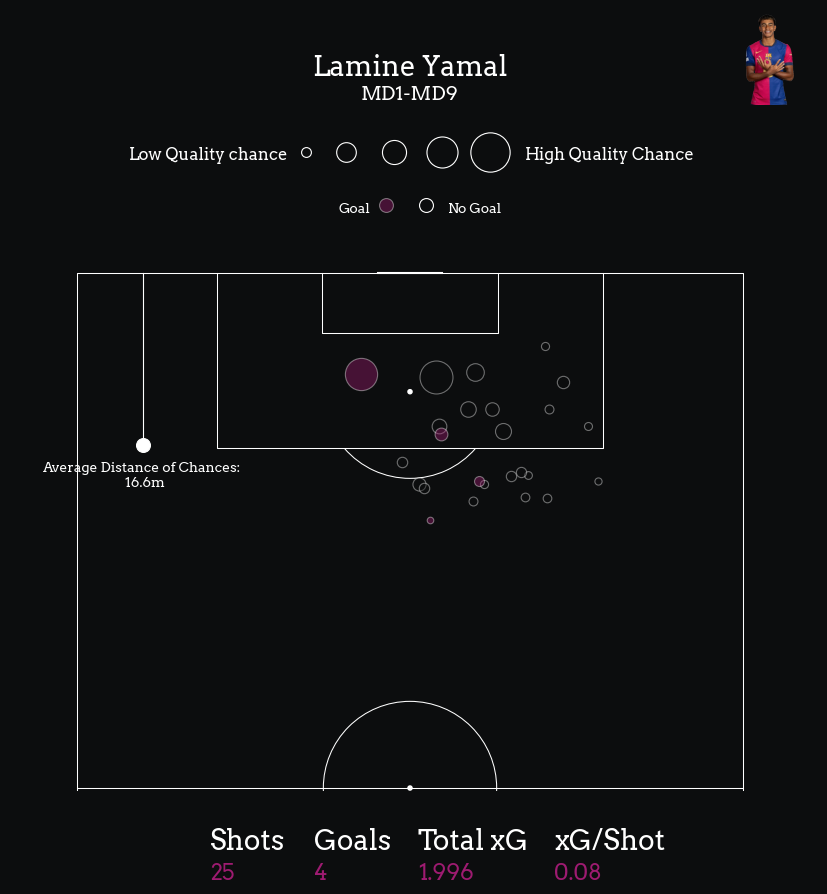

In [111]:
fig=plt.figure(figsize=(8,12))
fig.patch.set_facecolor(background_color)

#AX1
ax1=fig.add_axes([0,.7,1,0.2])
ax1.axis('off')
ax1.set_facecolor(background_color)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax1.text(
    x=.5,
    y=.85,
    s="Lamine Yamal",
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'   
)
ax1.text(
    x=.5,
    y=.75,
    s="MD1-MD9",
    fontsize=14,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'   
)


ax1.text(
    x=.25,
    y=.5,
    s="Low Quality chance ",
    fontsize=12,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'   
)
ax1.scatter(
    x=0.37,
    y=0.53,
    s=50,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
#2
ax1.scatter(
    x=0.42,
    y=0.53,
    s=200,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
#3
ax1.scatter(
    x=0.48,
    y=0.53,
    s=300,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
#4
ax1.scatter(
    x=0.54,
    y=0.53,
    s=500,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
#5
ax1.scatter(
    x=0.6,
    y=0.53,
    s=800,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.text(
    x=.75,
    y=.5,
    s="High Quality Chance",
    fontsize=12,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'   
)
#And to Add the last row 

ax1.text(
    x=0.43,
    y=0.28,
    s="Goal",
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)

ax1.scatter(
    x=0.47,
    y=0.31,
    s=100,
    color='#9e1b71',
    edgecolor='white',
    linewidth=0.8,
    alpha=0.4
)

ax1.scatter(
    x=0.52,
    y=0.31,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=0.8
)



ax1.text(
    x=0.58,
    y=0.28,
    s="No Goal",
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)

image_xaxis = 0.75
image_yaxis = 0.845
image_width = 0.4
image_height = 0.08
ax_image = fig.add_axes([image_xaxis,
                         image_yaxis,
                         image_width,
                         image_height],alpha=0.1
                       )

# Display the image
ax_image.imshow(image)
ax_image.axis('off')  # Remove axis of the image


#AX2
ax2=fig.add_axes([.05,.25,.9,0.5])
ax2.axis('off')
ax2.set_facecolor(background_color)
pitch=VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=background_color,
    pad_bottom=0.5,
    line_color='white',
    linewidth=.75,
    axis=True,
    label=True
)
pitch.draw(ax=ax2)
ax2.scatter(x=90,
            y=avg_x,
            s=100,
            color='white',
            linewidth=.8
           )
ax2.plot([90,90],[100,avg_x],color='white',linewidth=.8)
ax2.text(
    x=90,
    y=avg_x-4,
    s = f"Average Distance of Chances: \n {actual_avg_dist}m",
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='center'
)
for index,row in df.iterrows():
    pitch.scatter(
        row['X'],
        row['Y'],
        s=1300*row['xG'],
        color='#9e1b71' if row['result']=='Goal' else background_color,
        ax=ax2,
        alpha=.4,
        linewidth=0.8,
        edgecolor='white'
    )
plt.tick_params(axis='x', bottom=False, top=False, labelbottom=False)
plt.grid(False)
plt.tick_params(axis='both', labelbottom=False, labelleft=False)

# Remove the y-axis
ax3=fig.add_axes([0,.2,1,0.05])
ax3.axis('off') #This way remove the background numbers and grids
ax3.set_facecolor(background_color)
ax3.text(
    x=0.25,
    y=.5,
    s="Shots",
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
    
)
ax3.text(x=0.25,y=0,s=f"{total_shots}",fontsize=16,fontproperties=font_props,color='#9e1b71',ha='left')

ax3.text(
    x=0.38,
    y=.5,
    s="Goals",
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)
ax3.text(x=0.38,y=0,s=f"{total_goals}",fontsize=16,fontproperties=font_props,color='#9e1b71',ha='left')



ax3.text(
    x=0.51,
    y=.5,
    s="Total xG",
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
    
)
ax3.text(x=0.51,y=0,s=f"{total_xG}",fontsize=16,fontproperties=font_props,color='#9e1b71',ha='left')
ax3.text(
    x=0.68,
    y=.5,
    s="xG/Shot",
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
    
)
ax3.text(x=0.68,y=0,s=f"{xG_per_shot}",fontsize=16,fontproperties=font_props,color='#9e1b71',ha='left')
plt.show()

In [112]:
fig.savefig('Yamal.png',dpi=600)